# Jupiter's Notebook for Scenario 05
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), and [imbalanced-learn](https://imbalanced-learn.org/stable/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-05-Mixed-traffic.csv')

In [4]:
#check dimensions
df.shape

(235047, 52)

## Pre-feature selection

In [5]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [6]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [7]:
#sumarize the number of unique values for each column (feature)
print(df.nunique())

proto                      2
ts                    235047
srcIP                  10896
srcPrt                 52820
dstIP                   9121
dstPrt                   159
flowduration          146619
total_fpackets           646
total_bpackets           837
total_fpktl             9020
total_bpktl            19539
min_fpktl                128
min_bpktl                495
max_fpktl               1292
max_bpktl               1002
mean_fpktl             18650
mean_bpktl             22812
std_fpktl              31894
std_bpktl              28039
total_fipt             79401
total_bipt             68439
min_fipt               39584
min_bipt               21411
max_fipt               77114
max_bipt               60980
mean_fipt              76692
mean_bipt              66633
std_fipt               65172
std_bipt               59806
fpsh_cnt                 142
bpsh_cnt                 383
furg_cnt                   1
burg_cnt                   1
total_fhlen             3078
total_bhlen   

In [8]:
#delete columns with a single unique value
#get the indexes of the single-valued columns
counts=df.nunique()
to_del=[i for i,v in enumerate(counts) if v==1]
print(to_del)
#drop unless columns
df.drop(df.columns[to_del],axis=1,inplace=True)
print(df.shape)

[31, 32, 47, 49]
(235047, 48)


In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    235047
srcIP                  10896
srcPrt                 52820
dstIP                   9121
dstPrt                   159
flowduration          146619
total_fpackets           646
total_bpackets           837
total_fpktl             9020
total_bpktl            19539
min_fpktl                128
min_bpktl                495
max_fpktl               1292
max_bpktl               1002
mean_fpktl             18650
mean_bpktl             22812
std_fpktl              31894
std_bpktl              28039
total_fipt             79401
total_bipt             68439
min_fipt               39584
min_bipt               21411
max_fipt               77114
max_bipt               60980
mean_fipt              76692
mean_bipt              66633
std_fipt               65172
std_bipt               59806
fpsh_cnt                 142
bpsh_cnt                 383
total_fhlen             3078
total_bhlen             4012
fPktsPerSecond        136400
bPktsPerSecond

In [10]:
#delete ts, srcIP and dstIP columns
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

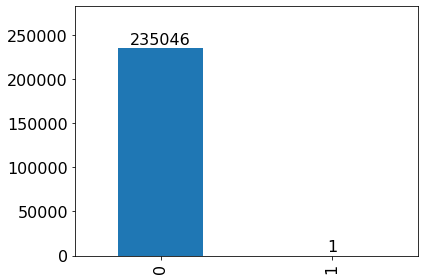

In [11]:
#Consider columns that have very few values, e.g. flow_cwr column
ax = df['flow_cwr'].value_counts().plot(kind='bar',fontsize=16) 
for p in ax.patches:
    x = p.get_x()
    h = p.get_height()
    w = p.get_width()
    ax.annotate(f'{h:.0f}\n', (x + w/2, h), ha='center', va='center', size=16)
plt.margins(y=0.2)
plt.tight_layout()
plt.show()

In [12]:
#delete flow_cwr column
df.drop('flow_cwr',axis=1,inplace=True)

In [13]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 234175, 1: 872})

In [14]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(235047, 44)
(233046, 44)


In [15]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 232174, 1: 872})

In [16]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,...,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,downUpRatio,label
0,TCP,50673,80,5.058138,30,46,2181,60058,60,54,...,818.934211,680.514587,0.131807,0.782458,2,2,0,75,27.536909,0
1,TCP,37998,25,1.165490,3,3,194,162,62,54,...,59.333333,6.022182,0.233104,0.319191,0,3,3,3,0.835052,0
2,TCP,50707,80,5.063241,28,43,2055,55798,60,54,...,814.830986,681.063843,0.139963,0.793474,2,2,0,70,27.152311,0
3,TCP,50727,80,5.068497,26,41,1939,52894,60,54,...,818.402985,680.254456,0.147856,0.809372,2,2,0,66,27.279009,0
4,TCP,17095,80,0.754277,38,65,2601,88789,60,54,...,887.281553,667.837280,0.007496,0.022677,0,2,1,102,34.136486,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235042,UDP,29025,53,0.000243,1,1,85,136,85,136,...,110.500000,36.062447,0.000243,0.000000,0,0,0,0,1.600000,0
235043,UDP,23952,53,0.000307,1,1,74,166,74,166,...,120.000000,65.053825,0.000307,0.000000,0,0,0,0,2.243243,0
235044,UDP,55139,53,0.000250,1,1,74,166,74,166,...,120.000000,65.053825,0.000250,0.000000,0,0,0,0,2.243243,0
235045,UDP,43136,53,0.000000,1,0,67,0,67,0,...,67.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0


In [17]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 232174 of 233046 (99.6%)
> Class 1 : 872 of 233046 (0.4%)


# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [18]:
#Data types for each attibute
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSecond        float64
flowPktsPerSecond     float64
flowBytesP

In [19]:
#create training and test dataset
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [20]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [21]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])

# transform the datasets
training_numeric_dataset = enc.fit_transform(X_train, y_train)
testing_numeric_dataset = enc.transform(X_test)

In [22]:
#show the coded features
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,...,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,downUpRatio
130622,0.000089,0.000179,0.000034,0.244809,1,1,75,234,75,234,...,1.262209e+03,154.5,112.429977,0.244809,0.0,0,0,0,0,3.120000
154682,0.000089,0.000025,0.000034,0.094433,1,1,79,256,79,256,...,3.547486e+03,167.5,125.157898,0.094433,0.0,0,0,0,0,3.240506
62790,0.000089,0.000179,0.000034,0.128450,1,1,76,76,76,76,...,1.183341e+03,76.0,0.000000,0.128450,0.0,0,0,0,0,1.000000
216383,0.000089,0.000068,0.000034,0.200984,1,1,73,73,73,73,...,7.264260e+02,73.0,0.000000,0.200984,0.0,0,0,0,0,1.000000
145496,0.000089,0.000179,0.000034,0.000177,1,1,85,149,85,149,...,1.322732e+06,117.0,45.254833,0.000177,0.0,0,0,0,0,1.752941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120683,0.000089,0.001017,0.000034,0.000217,1,1,85,169,85,169,...,1.170718e+06,127.0,59.396969,0.000217,0.0,0,0,0,0,1.988235
104328,0.000089,0.000068,0.000034,0.143165,1,1,71,71,71,71,...,9.918618e+02,71.0,0.000000,0.143165,0.0,0,0,0,0,1.000000
132863,0.000089,0.000025,0.000034,0.000539,1,1,85,149,85,149,...,4.340854e+05,117.0,45.254833,0.000539,0.0,0,0,0,0,1.752941
147967,0.000089,0.000179,0.000034,0.000195,1,1,165,54,165,54,...,1.122925e+06,109.5,78.488853,0.000195,0.0,0,0,0,0,0.327273


In [23]:
#show the coded features
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,...,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,downUpRatio
4767,0.017203,6.315573e-08,0.002744,7.186589,6,4,1260,530,60,54,...,2.490750e+02,179.000000,287.785797,1.330888,2.071102,1,2,1,9,0.420635
9787,0.017203,3.781459e-03,0.002744,5.254203,12,19,1951,21483,60,54,...,4.460048e+03,755.935484,668.596802,0.341379,1.257006,1,2,0,30,11.011276
88970,0.000089,0.000000e+00,0.000034,48.541293,12,12,1020,1020,85,85,...,4.202607e+01,85.000000,0.000000,2.271531,2.650631,0,0,0,0,1.000000
200741,0.000089,1.016991e-03,0.000034,0.000313,1,1,84,176,84,176,...,8.305552e+05,130.000000,65.053825,0.000313,0.000000,0,0,0,0,2.095238
50872,0.000089,3.445102e-06,0.000034,0.733001,1,1,72,72,72,72,...,1.964527e+02,72.000000,0.000000,0.733001,0.000000,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42421,0.017203,9.350122e-06,0.002744,0.238693,5,5,551,529,66,66,...,4.524641e+03,108.000000,83.603561,0.036432,0.059081,2,2,0,9,0.960073
233523,0.000089,1.793390e-04,0.000034,0.000387,1,1,85,255,85,255,...,8.786589e+05,170.000000,120.208153,0.000387,0.000000,0,0,0,0,3.000000
19280,0.017203,6.801411e-05,0.002744,0.000013,1,1,66,66,66,66,...,1.006633e+07,66.000000,0.000000,0.000013,0.000000,1,0,0,2,1.000000
131374,0.000089,3.781459e-03,0.000034,4.959883,1,1,71,71,71,71,...,2.862970e+01,71.000000,0.000000,4.959883,0.000000,0,0,0,0,1.000000


# Standardization and scaling of numerical variables

In [24]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [25]:
X_train_prep = preprocessor.fit_transform(training_numeric_dataset)
X_test_prep  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

In [26]:
#Dimensions of training and testing datasets
X_train_prep.shape, X_test_prep.shape

((186436, 43), (46610, 43))

# Feature selection
Exclusion of variables with variance close to zero

In [27]:
#join the prepared traing and test datasets in a single array X and y
X = np.vstack((X_train_prep, X_test_prep))
y = np.hstack((y_train, y_test))

In [28]:
collections.Counter(y)

Counter({0: 232174, 1: 872})

>Threshold=0.00, Features=43
>Threshold=0.05, Features=43
>Threshold=0.10, Features=43
>Threshold=0.15, Features=43
>Threshold=0.20, Features=42
>Threshold=0.25, Features=42
>Threshold=0.30, Features=42
>Threshold=0.35, Features=42
>Threshold=0.40, Features=42
>Threshold=0.45, Features=42
>Threshold=0.50, Features=42
>Threshold=0.55, Features=42
>Threshold=0.60, Features=41
>Threshold=0.65, Features=41


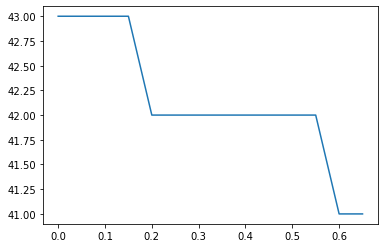

In [29]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
from numpy import arange
#split data into inputs
#data=df_float.values
#X=data[:,:]
#define thresholds to check
thresholds = arange(0.0,0.7,0.05)
#apply transform with each treshold
results=list()
for t in thresholds:
    #define the transform
    transform = VarianceThreshold(threshold=t)
    #transform the input data
    X_sel=transform.fit_transform(X)
    #determine the number of input features
    n_features=X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' %(t,n_features))
    #store the result
    results.append(n_features)
#plot the theshold vs the number of selected features
plt.plot(thresholds,results)
plt.show()

In [30]:
#new set of selected features
X=X_sel
print(X.shape)

(233046, 41)


# Create Machine Learning Models

### a) Grid search with Logistic Regression (GS-LR)

In [31]:
# grid search class weights with logistic regression for imbalanced classification

model = LogisticRegression(solver='lbfgs',max_iter=1000)
# define grid
balance = [{0:0.001,1:1.0},{0:0.01,1:1.0}, {0:0.1,1:1}, {0:1,1:100},{0:1,1:200}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,
scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.996338 using {'class_weight': {0: 0.001, 1: 1.0}}
0.996338 (0.004512) with: {'class_weight': {0: 0.001, 1: 1.0}}
0.991506 (0.007167) with: {'class_weight': {0: 0.01, 1: 1.0}}
0.987277 (0.009871) with: {'class_weight': {0: 0.1, 1: 1}}
0.990923 (0.006545) with: {'class_weight': {0: 1, 1: 100}}
0.995092 (0.005142) with: {'class_weight': {0: 1, 1: 200}}


C:\Users\pvelarde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Modelo de LR con pesos de clase seleccionado

In [30]:
## split into train test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#evaluating a class-weighted logistic regression algorithm on the imbalanced classiffication dataset
#listing 16.12

weights = {0: 0.01, 1: 1.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights,max_iter=2000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

C:\Users\pvelarde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROCAUC score: 0.9750141280947255
Accuracy score: 0.993649431452478
F1 score: 0.5083056478405316
Recall score: 0.95625
Precision score: 0.34615384615384615
              precision    recall  f1-score   support

     class 0       1.00      0.99      1.00     46450
     class 1       0.35      0.96      0.51       160

    accuracy                           0.99     46610
   macro avg       0.67      0.98      0.75     46610
weighted avg       1.00      0.99      1.00     46610



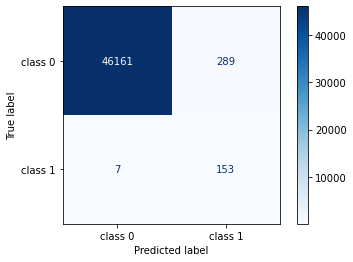

In [32]:
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(model, X_test, y_test, display_labels=target_names,cmap=plt.cm.Blues);

 ### b) Logistic Regression with Synthetic minority over-sampleing technique (LR+SMOTE)

In [39]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
X_smote , y_smote = smote.fit_resample(X, y)

print('Origianl dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 232174, 1: 872})
Resample dataset shape: Counter({0: 232174, 1: 232174})


In [40]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_smote, y_smote, test_size =0.20, random_state=42)

In [41]:
model2=LogisticRegression(solver='lbfgs',max_iter=2000)
model2.fit(X_train2, y_train2)
y_pred2=model2.predict(X_test2)

C:\Users\pvelarde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROCAUC score: 0.9918810887237363
Accuracy score: 0.9918811241520404
F1 score: 0.9918980486546892
Recall score: 0.9918980486546892
Precision score: 0.9918980486546892
              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99     46338
     class 1       0.99      0.99      0.99     46532

    accuracy                           0.99     92870
   macro avg       0.99      0.99      0.99     92870
weighted avg       0.99      0.99      0.99     92870



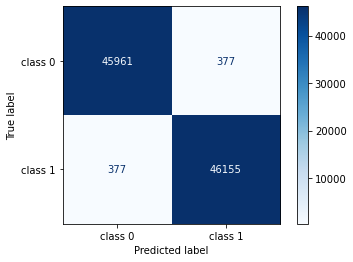

In [42]:
print('ROCAUC score:',roc_auc_score(y_test2, y_pred2))
print('Accuracy score:',accuracy_score(y_test2, y_pred2))
print('F1 score:',f1_score(y_test2, y_pred2))
print('Recall score:',recall_score(y_test2, y_pred2))
print('Precision score:',precision_score(y_test2, y_pred2))

print(classification_report(y_test2, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, X_test2, y_test2, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Support Vector Machine (W-SVM)

In [ ]:
#train a model using Penalized-SVM on the original imbalanced dataset:
# we can add class_weight='balanced' to add panalize mistake
model_SVM = SVC(class_weight='balanced', probability=True)
model_SVM.fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)

In [45]:
y_pred_SVM = model_SVM.predict(X_test)

ROCAUC score: 0.6850988966630785
Accuracy score: 0.9744475434456126
F1 score: 0.09567198177676538
Recall score: 0.39375
Precision score: 0.05445116681071737
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99     46450
     class 1       0.05      0.39      0.10       160

    accuracy                           0.97     46610
   macro avg       0.53      0.69      0.54     46610
weighted avg       0.99      0.97      0.98     46610



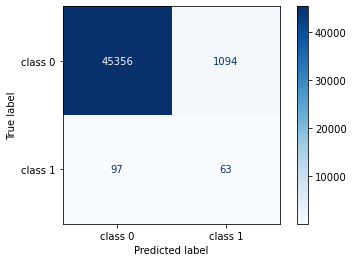

In [46]:
print('ROCAUC score:',roc_auc_score(y_test, y_pred_SVM))
print('Accuracy score:',accuracy_score(y_test, y_pred_SVM))
print('F1 score:',f1_score(y_test, y_pred_SVM))
print('Recall score:',recall_score(y_test, y_pred_SVM))
print('Precision score:',precision_score(y_test, y_pred_SVM))

print(classification_report(y_test, y_pred_SVM, target_names=target_names))
plot_confusion_matrix(model_SVM, X_test, y_test, display_labels=target_names,cmap=plt.cm.Blues);

# Undersampling using CNN
Condensed Nearest Neighbor (CNN) is used to remove redundant examples from the interior of the density of the majority class. 

In [47]:
# undersample an imbalanced dataset with the Condensed Nearest Neighbor Rule pp.148
from imblearn.under_sampling import CondensedNearestNeighbour

In [48]:
counter = Counter(y)
print(counter)

Counter({0: 232174, 1: 872})


In [49]:
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
Xu, yu = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(yu)
print(counter)

Counter({1: 872, 0: 368})


### d) Weighted Decision Tree with Condensed Nearest Neighbor (DT+CNN)
The `DecisionTreeClassifier` class provides the class weight argument that can be speci ed as a model hyperparameter. The class weight is a dictionary that de nes each class label (e.g. 0 and 1) and the weighting to apply in the calculation of group purity for splits in the decision tree when tting the model.

In [50]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xu, yu, test_size =0.20, random_state=42)

In [51]:
# define model
model_DT = DecisionTreeClassifier(class_weight='balanced')
#model performance
model_DT.fit(X_train3, y_train3)
y_pred_DT=model_DT.predict(X_test3)

ROCAUC score: 0.9812971342383107
Accuracy score: 0.9838709677419355
F1 score: 0.9882352941176471
Recall score: 0.9882352941176471
Precision score: 0.9882352941176471
              precision    recall  f1-score   support

     class 0       0.97      0.97      0.97        78
     class 1       0.99      0.99      0.99       170

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



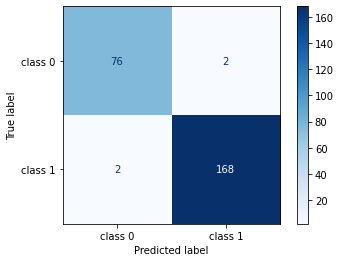

In [52]:
print('ROCAUC score:',roc_auc_score(y_test3, y_pred_DT))
print('Accuracy score:',accuracy_score(y_test3, y_pred_DT))
print('F1 score:',f1_score(y_test3, y_pred_DT))
print('Recall score:',recall_score(y_test3, y_pred_DT))
print('Precision score:',precision_score(y_test3, y_pred_DT))

print(classification_report(y_test3, y_pred_DT, target_names=target_names))
plot_confusion_matrix(model_DT, X_test3, y_test3, display_labels=target_names,cmap=plt.cm.Blues);

### d) Weighted Decision Tree with Condensed Nearest Neighbor (DT+CNN)

In [55]:
model_SVM_cnn = SVC(class_weight='balanced', probability=True)
model_SVM_cnn.fit(X_train3, y_train3)
y_pred_SVM_cnn = model_SVM_cnn.predict(X_test3)

ROCAUC score: 0.5835595776772248
Accuracy score: 0.7096774193548387
F1 score: 0.8134715025906736
Recall score: 0.9235294117647059
Precision score: 0.7268518518518519
              precision    recall  f1-score   support

     class 0       0.59      0.24      0.35        78
     class 1       0.73      0.92      0.81       170

    accuracy                           0.71       248
   macro avg       0.66      0.58      0.58       248
weighted avg       0.68      0.71      0.67       248



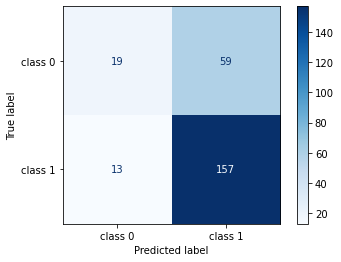

In [56]:
print('ROCAUC score:',roc_auc_score(y_test3, y_pred_SVM_cnn))
print('Accuracy score:',accuracy_score(y_test3, y_pred_SVM_cnn))
print('F1 score:',f1_score(y_test3, y_pred_SVM_cnn))
print('Recall score:',recall_score(y_test3, y_pred_SVM_cnn))
print('Precision score:',precision_score(y_test3, y_pred_SVM_cnn))

print(classification_report(y_test3, y_pred_SVM_cnn, target_names=target_names))
plot_confusion_matrix(model_SVM_cnn, X_test3, y_test3, display_labels=target_names,cmap=plt.cm.Blues);